In [1]:
import requests
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
symbol = "ETHAUD"

In [3]:
r = requests.get("https://api.binance.com/api/v3/trades", params=dict(symbol=symbol))
results = r.json()

In [4]:
data = pd.DataFrame(data=results, dtype=float)
data

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,98236.0,834.28,1.33537,1114.072484,1.608961e+12,0.0,1.0
1,98237.0,831.34,0.31756,264.000330,1.608961e+12,1.0,1.0
2,98238.0,831.65,0.07000,58.215500,1.608961e+12,1.0,1.0
3,98239.0,833.23,0.03987,33.220880,1.608961e+12,0.0,1.0
4,98240.0,832.53,0.03987,33.192971,1.608961e+12,0.0,1.0
...,...,...,...,...,...,...,...
495,98731.0,851.23,0.05977,50.878017,1.609006e+12,0.0,1.0
496,98732.0,852.44,0.04694,40.013534,1.609006e+12,0.0,1.0
497,98733.0,852.44,0.07106,60.574386,1.609006e+12,0.0,1.0
498,98734.0,853.02,0.07469,63.712064,1.609006e+12,0.0,1.0


In [19]:
frame = pd.read_json("https://api.binance.com/api/v3/trades?symbol=ETHAUD", convert_dates=["time"])
frame.set_index("time", inplace=True)
frame

,id,price,qty,quoteQty,isBuyerMaker,isBestMatch
time,,,,,,
2020-12-26 05:29:47.171,98237,831.34,0.31756,264.000330,True,True
2020-12-26 05:37:09.083,98238,831.65,0.07000,58.215500,True,True
2020-12-26 05:40:11.320,98239,833.23,0.03987,33.220880,False,True
2020-12-26 05:40:13.319,98240,832.53,0.03987,33.192971,False,True
2020-12-26 05:40:14.320,98241,832.53,0.03987,33.192971,False,True
...,...,...,...,...,...,...
2020-12-26 18:04:23.941,98732,852.44,0.04694,40.013534,False,True
2020-12-26 18:05:44.767,98733,852.44,0.07106,60.574386,False,True
2020-12-26 18:05:49.484,98734,853.02,0.07469,63.712064,False,True


In [36]:
frame.rolling(window=5).mean()

,id,price,qty,quoteQty,isBuyerMaker,isBestMatch
time,,,,,,
2020-12-26 05:29:47.171,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 05:37:09.083,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 05:40:11.320,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 05:40:13.319,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26 05:40:14.320,98239.0,832.256,0.101434,84.364531,0.4,1.0
...,...,...,...,...,...,...
2020-12-26 18:04:23.941,98730.0,851.646,0.067724,57.668109,0.2,1.0
2020-12-26 18:05:44.767,98731.0,851.688,0.071208,60.640263,0.2,1.0
2020-12-26 18:05:49.484,98732.0,852.072,0.065538,55.843207,0.0,1.0


In [20]:
series = frame["price"]
series

time
2020-12-26 05:29:47.171    831.34
2020-12-26 05:37:09.083    831.65
2020-12-26 05:40:11.320    833.23
2020-12-26 05:40:13.319    832.53
2020-12-26 05:40:14.320    832.53
                            ...  
2020-12-26 18:04:23.941    852.44
2020-12-26 18:05:44.767    852.44
2020-12-26 18:05:49.484    853.02
2020-12-26 18:05:50.897    853.02
2020-12-26 18:15:44.927    852.11
Name: price, Length: 500, dtype: float64

In [40]:
series.rolling(window=30).mean()

time
2020-12-26 05:29:47.171           NaN
2020-12-26 05:37:09.083           NaN
2020-12-26 05:40:11.320           NaN
2020-12-26 05:40:13.319           NaN
2020-12-26 05:40:14.320           NaN
                              ...    
2020-12-26 18:04:23.941    850.024667
2020-12-26 18:05:44.767    850.164667
2020-12-26 18:05:49.484    850.324000
2020-12-26 18:05:50.897    850.483333
2020-12-26 18:15:44.927    850.612333
Name: price, Length: 500, dtype: float64

In [30]:
mins = series.resample('30T').min().reset_index()
maxs = series.resample('30T').max().reset_index()

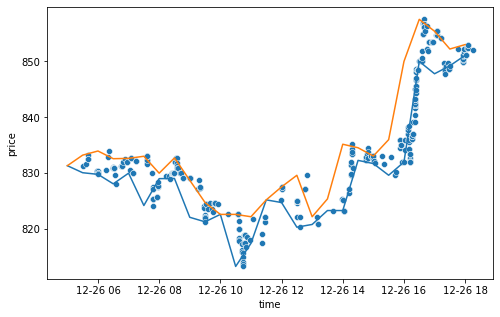

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x='time', y='price', data=frame, ax=ax)
sns.lineplot(x='time', y='price', data=mins, ax=ax)
sns.lineplot(x='time', y='price', data=maxs, ax=ax)

plt.show()